In [1]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Danielle\Desktop\history_cleaned-5.csv")
df.shape

(11967, 2)

In [3]:
df.head()

,Time,domain
0,2/19/2021 0:11,github.com
1,2/19/2021 0:11,github.com
2,2/19/2021 0:10,github.com
3,2/19/2021 0:09,github.com
4,2/19/2021 0:08,github.com


In [4]:
df.tail()

,Time,domain
11962,1600-12-31 19:00:00,www.khanacademy.org
11963,1600-12-31 19:00:00,stanford.edu
11964,1600-12-31 19:00:00,extensiongallery.tableau.com
11965,1600-12-31 19:00:00,www.facebook.com
11966,1600-12-31 19:00:00,www.airbnb.co.in


In [5]:
df.dtypes

Time      object
domain    object
dtype: object

In [6]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900')

8260

In [7]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy()

In [8]:
df['Time'] = pd.to_datetime(df['Time'])

In [9]:
df['domain'].value_counts()[:50]

www.google.com                       616
www.instagram.com                    394
stackoverflow.com                    245
www.youtube.com                      197
www.amazon.com                       148
mail.google.com                      145
blackboard.umbc.edu                  122
colab.research.google.com            117
github.com                           105
webauth.umbc.edu                      99
piazza.com                            73
docs.google.com                       67
lucid.app                             58
www.hackerrank.com                    53
www.geeksforgeeks.org                 51
drive.google.com                      39
www.kaggle.com                        29
accounts.google.com                   29
umbc.app.box.com                      26
www.facebook.com                      23
retail.onlinesbi.com                  21
archive.ics.uci.edu                   20
towardsdatascience.com                18
id.analyticsvidhya.com                17
datahack.analyti

<AxesSubplot:>

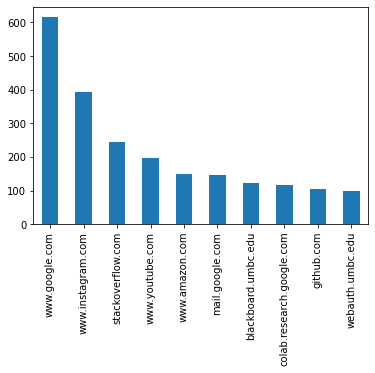

In [10]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [11]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     266
1     127
8       4
9     116
10    272
11    399
12    126
13    152
14    137
15    188
16    394
17    260
18    185
19    189
20    260
21     54
22    273
23    305
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

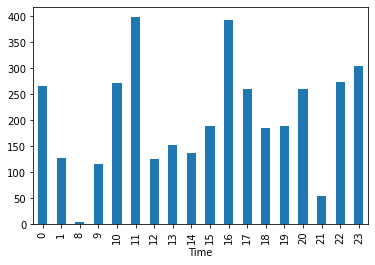

In [12]:
hourly_counts.plot.bar()

In [13]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2021-02-19 00:11:00,github.com,Friday,4
1,2021-02-19 00:11:00,github.com,Friday,4
2,2021-02-19 00:10:00,github.com,Friday,4
3,2021-02-19 00:09:00,github.com,Friday,4
4,2021-02-19 00:08:00,github.com,Friday,4


In [14]:
df['Day'].value_counts()

Thursday     709
Tuesday      661
Monday       587
Friday       569
Saturday     471
Wednesday    419
Sunday       291
Name: Day, dtype: int64

In [15]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    587
1    661
2    419
3    709
4    569
5    471
6    291
Name: DayIndex, dtype: int64

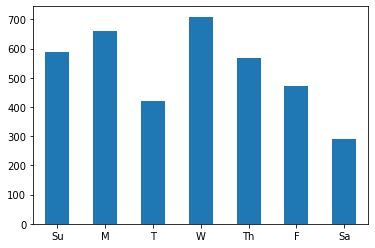

In [16]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['Su','M', 'T', 'W','Th', 'F', 'Sa'], rotation=0)

plt.show()

In [17]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2021-02-19 00:11:00,github.com,Friday,4,False
1,2021-02-19 00:11:00,github.com,Friday,4,False
2,2021-02-19 00:10:00,github.com,Friday,4,False
3,2021-02-19 00:09:00,github.com,Friday,4,False
4,2021-02-19 00:08:00,github.com,Friday,4,False


In [18]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]

In [19]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
735,2021-02-14 23:48:00,www.amazon.com,Sunday,6,True
736,2021-02-14 23:48:00,www.amazon.com,Sunday,6,True
737,2021-02-14 23:48:00,www.amazon.com,Sunday,6,True
738,2021-02-14 23:47:00,www.amazon.com,Sunday,6,True
739,2021-02-14 23:41:00,docs.google.com,Sunday,6,True


In [20]:
weekday['domain'].value_counts()[:5]

www.google.com       439
www.instagram.com    248
stackoverflow.com    161
www.youtube.com      161
www.amazon.com       144
Name: domain, dtype: int64

In [21]:
weekend['domain'].value_counts()[:5]

www.google.com       177
www.instagram.com    146
stackoverflow.com     84
www.youtube.com       36
github.com            32
Name: domain, dtype: int64

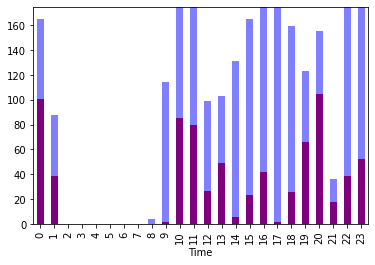

In [22]:
def show_stats(df, color, alpha=1):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.ylim([0, 175])

    
show_stats(weekend, 'red', 1)
    
show_stats(weekday, 'blue', 0.5)

In [23]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply becasue there are more weekdays

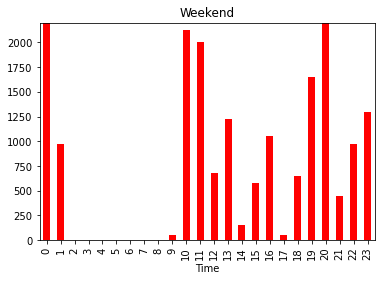

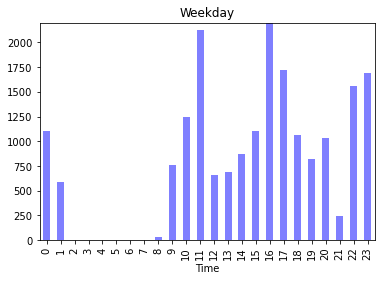

In [24]:
def show_stats(df, color, alpha=1, title='', y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)
    plt.show()


    
y_lim=[0, 2200]
show_stats(weekend, 'red', 1, 'Weekend', y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday', y_lim=y_lim)

In [25]:
df['domain'].value_counts()[:50]

www.google.com                       616
www.instagram.com                    394
stackoverflow.com                    245
www.youtube.com                      197
www.amazon.com                       148
mail.google.com                      145
blackboard.umbc.edu                  122
colab.research.google.com            117
github.com                           105
webauth.umbc.edu                      99
piazza.com                            73
docs.google.com                       67
lucid.app                             58
www.hackerrank.com                    53
www.geeksforgeeks.org                 51
drive.google.com                      39
www.kaggle.com                        29
accounts.google.com                   29
umbc.app.box.com                      26
www.facebook.com                      23
retail.onlinesbi.com                  21
archive.ics.uci.edu                   20
towardsdatascience.com                18
id.analyticsvidhya.com                17
datahack.analyti

In [26]:
df['domain'] = df['domain'].astype(str)

In [27]:
def get_data_for_domain(val):
    return df[ [True if val.lower() in i.lower() else False for i in df['domain'] ]]


def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

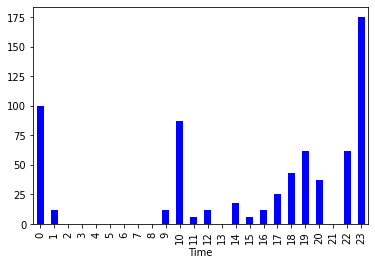

In [28]:
_= show_domain_stats('github', 'blue')

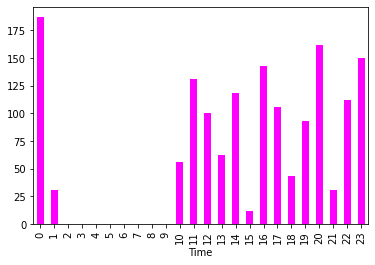

In [29]:
_ = show_domain_stats('stackoverflow', 'magenta')

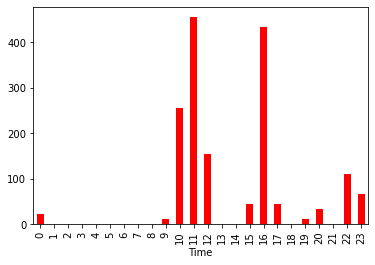

In [30]:
_ = show_domain_stats('amazon', 'red')

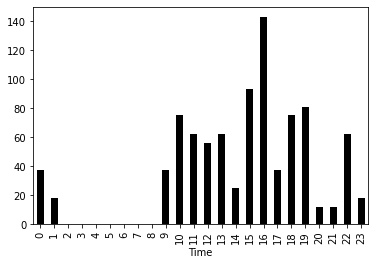

In [31]:
_=show_domain_stats('mail', 'black')

Based on data, what can we tell about this person?

1) Is this a work computer/personal computer? 
This looks like a personal computer. The most visited website was github, and this individual visited various UMBC sites.
This individual is most likely a student.

2) Is s/he employed? 
There don't appear to be any logins to work accounts logins...so
probably not, but s/he could be doing some freelance work.

3) What is her/his interests?
Based upon this data, this person is interested in school, data science/python, facebook, amazon purchases, 
a bit of online bannking, etc.

4) List any interesting findings:
Yes! This person seems to need much less sleep than I do. S/he generally showed activity between the hours of 8 or 9 am and 1 am, leaving about 7, max 8 hours for sleep.
I need 9 hours. :)
I think this person may also be in the DATA 604 course as well, due to his or her usage of the Lucid app.